In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [6]:
cd /content/drive/My Drive/Emotion Recogition/code/python_files

/content/drive/My Drive/Emotion Recogition/code/python_files


In [0]:
import numpy as np
import os
import sys
import pandas as pd

import wave
from imblearn.over_sampling import SMOTE

import keras
from keras.models import Sequential, Model
from keras.layers.core import Dense, Activation
from keras.layers import LSTM, Input, Flatten,Dropout,GlobalAveragePooling2D,MaxPooling2D,GlobalMaxPooling2D,GlobalAveragePooling1D
from keras.layers.convolutional import Conv2D,Conv1D
from keras.models import load_model
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing import sequence
from scipy import signal
import matplotlib.pyplot as plt
from helper import *
from sklearn.preprocessing import LabelEncoder
from keras.layers.normalization import BatchNormalization


In [0]:

code_path = os.path.dirname(os.path.realpath(os.getcwd()))
emotions_used = np.array(['ang', 'exc','neu','sad'])
data_path = code_path + "/../data/sessions/"
sessions = ['Session1', 'Session2', 'Session3', 'Session4', 'Session5']
framerate = 16000

In [0]:
import pickle
with open(code_path + '/../data/'+'data_collected.pickle', 'rb') as handle:
    data2 = pickle.load(handle)

In [14]:
s = data2[0]['id']
print(s[-2])

0


In [0]:
X_train = []
X_test = []
Y_train = []
Y_test = []
test_length = []
fs = 16e3
counter = 0
counter1 = 0
for ses_mod in data2:
    if 'impro' in ses_mod['id'] and ses_mod['emotion'] in emotions_used:
        f, t, Sxx = signal.spectrogram(ses_mod['signal'], fs, nperseg=400,noverlap=200)
        Sxx = Sxx.flatten()
        Sxx = Sxx.reshape(-1,1)
        #Sxx = pad_sequence_into_array(Sxx,maxlen=300,value=0)
        
        if ses_mod['id'][:5]=="Ses05":
            test_length.append(len(ses_mod['signal'])/16000)
            counter+=1
            X_test.append(Sxx)
            Y_test.append(ses_mod['id'][-4])
        else:
            counter1+=1
            X_train.append(Sxx)
            Y_train.append(ses_mod['id'][-4])
        
print(counter)
print(counter1)

test_length = np.asarray(test_length)
X_test = np.asarray(X_test)
X_train = np.asarray(X_train)
print(X_train.shape)
print(X_test.shape)

625
2034
(2034,)
(625,)


In [0]:
X_train.shape[1]

IndexError: ignored

In [0]:
y  = pd.get_dummies(Y_train+Y_test)
y_train = y[0:len(Y_train)]
y_test = y[len(Y_train):]
y_train = np.array(y_train)
y_test = np.array(y_test)

In [0]:
X_train = X_train.reshape(-1,201,300,1)
X_test = X_test.reshape(-1,201,300,1)

In [0]:
test_length.max()

19.07

In [0]:
def make_model()
  in_layer = Input(shape=(None, None,nr_channels))
  x = Conv2D(16,(4,4), activation = 'elu')(in_layer)  # single stride 4x4 filter for 16 maps
  x = Conv2D(32,(4,4), activation = 'elu')(x)         # single stride 4x4 filter for 32 maps
  x = Dropout(0.5)(x)
  x = Conv2D(64,(4,4), activation = 'elu')(x)         # single stride 4x4 filter for 64 maps
  x = Dropout(0.5)(x)
  x = Conv2D(128, (1,1))(x)                           # finally 128 maps for global average-pool
  x = GlobalMaxPooling2D()(x)                     # pseudo-dense 128 layer
  output_layer = Dense(10, activation = "softmax")(x) # softmax output
  model = Model(inputs = input_layer, outputs=output_layer)
  model.compile(optimizer = "adam", loss = "categorical_crossentropy",
                metrics=["accuracy"])

In [0]:
def make_model():
    in_layer = Input(shape=(None,1))
    x = Conv1D(32,5, activation = 'elu')(in_layer) 
    x = Dropout(0.5)(x)
    x = Conv1D(64,5, activation = 'elu')(x)         
    x = Dropout(0.5)(x)
    x = Conv1D(64,5, activation = 'elu')(x)         
    x = Dropout(0.5)(x)
    x = Conv1D(128, 5)(x)                           
    x = GlobalAveragePooling1D()(x)                     
    x = Dense(64,activation='elu')(x)
    x = Dropout(0.5)(x)
    output_layer = Dense(4, activation = "softmax")(x) # softmax output
    model = Model(inputs = in_layer, outputs=output_layer)
    return model

In [0]:
model  =  make_model()
model.compile(optimizer = "adam", loss = "categorical_crossentropy",
                    metrics=["accuracy"])
m_check = keras.callbacks.ModelCheckpoint(filepath = './cnn_spectrogram_450.h5', monitor='val_acc', save_best_only=True, mode='max', verbose=1 )
hist = model.fit(X_train, y_train, 
                 batch_size=32, validation_data=(X_test,y_test),nb_epoch=100, verbose=1, shuffle = True,callbacks=[m_check] 
                )

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


ValueError: ignored

In [0]:
best_model = load_model('./cnn_spectrogram.h5')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


In [0]:
y_pred = best_model.predict(X_test)

In [0]:
from sklearn.metrics import classification_report, accuracy_score

In [0]:
for i in range(len(y_pred)):
  for j in range(len(y_pred[i])) :
    if y_pred[i][j]==max(y_pred[i]) :
      y_pred[i][j] = 1
      y_pred[i,0:j] = 0
      y_pred[i,j+1:] = 0
      break
   

In [0]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.34      0.45      0.39        31
           1       0.65      0.48      0.55       174
           2       0.65      0.78      0.71       287
           3       0.77      0.64      0.70       133

   micro avg       0.65      0.65      0.65       625
   macro avg       0.60      0.59      0.59       625
weighted avg       0.66      0.65      0.65       625
 samples avg       0.65      0.65      0.65       625



In [0]:
y_pred = np.argmax(y_pred,axis=1)
y_test = np.argmax(y_test,axis=1)


In [0]:
from mlxtend.evaluate import confusion_matrix
m = confusion_matrix(y_target=y_test, 
                      y_predicted=y_pred, 
                      binary=False)
print(m)

In [0]:
accuracy = np.array(y_pred==y_test).astype(int)

In [0]:
ang_freq = [0]*20
exc_freq = [0]*20
neu_freq = [0]*20
sad_freq = [0]*20
ang_acc = [0]*20
exc_acc = [0]*20
neu_acc = [0]*20
sad_acc = [0]*20

In [0]:
k=1

In [0]:
freq = [0] * (20//k)
acc = [0] * (20//k)

In [0]:
l=0

In [0]:
while(l<20):
  r=l+k
  for i in range(len(y_test)):
    if test_length[i]>=l and test_length[i]<r:
      if(y_test[i]==0):
        ang_freq[l]+=1
        ang_acc[l]+=accuracy[i]
      elif(y_test[i]==1):
        exc_freq[l]+=1
        exc_acc[l]+=accuracy[i]
      elif(y_test[i]==2):
        neu_freq[l]+=1
        neu_acc[l]+=accuracy[i]
      elif(y_test[i]==3):
        sad_freq[l]+=1
        sad_acc[l]+=accuracy[i]
  l=r

In [0]:
x = np.arange(0,20)

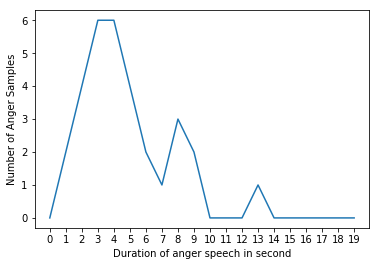

In [0]:
plt.plot(x,np.array(ang_freq))
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.xlabel("Duration of anger speech in second")
plt.ylabel('Number of Anger Samples')
plt.savefig('anger_Frequency.png')

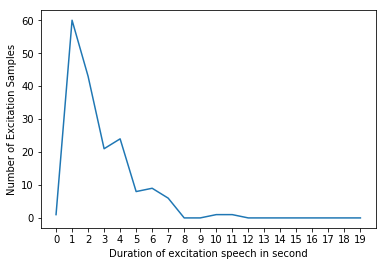

In [0]:
plt.plot(x,np.array(exc_freq))
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.xlabel("Duration of excitation speech in second")
plt.ylabel('Number of Excitation Samples')
plt.savefig('excitation_Frequency.png')

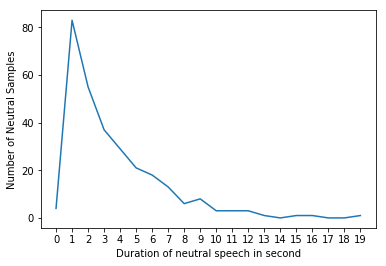

In [0]:
plt.plot(x,np.array(neu_freq))
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.xlabel("Duration of neutral speech in second")
plt.ylabel('Number of Neutral Samples')
plt.savefig('neutral_Frequency.png')

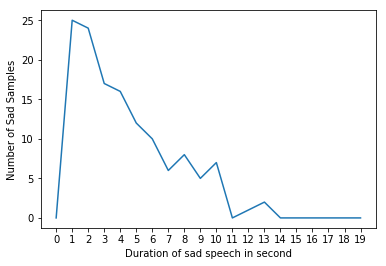

In [0]:
plt.plot(x,np.array(sad_freq))
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.xlabel("Duration of sad speech in second")
plt.ylabel('Number of Sad Samples')
plt.savefig('sad_Frequency.png')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


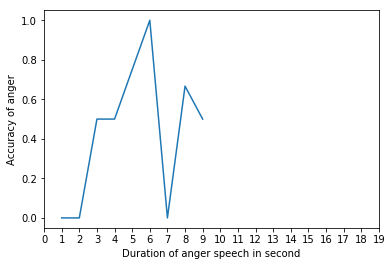

In [0]:
plt.plot(x,np.array(ang_acc)/np.array(ang_freq))
plt.xticks(np.arange(min(x), max(x)+1, 1))
plt.xlabel("Duration of anger speech in second")
plt.ylabel('Accuracy of anger')
plt.savefig('anger_accuracy.png')
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


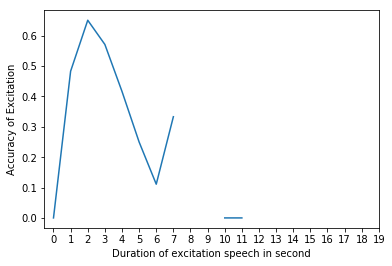

In [0]:
plt.plot(x,np.array(exc_acc)/np.array(exc_freq))
plt.xticks(np.arange(min(x), max(x)+1, 1))
plt.xlabel("Duration of excitation speech in second")
plt.ylabel('Accuracy of Excitation')
plt.savefig('excitation_accuracy.png')
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


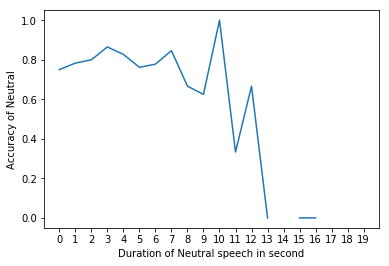

In [0]:
plt.plot(x,np.array(neu_acc)/np.array(neu_freq))
plt.xticks(np.arange(min(x), max(x)+1, 1))
plt.xlabel("Duration of Neutral speech in second")
plt.ylabel('Accuracy of Neutral')
plt.savefig('neutral_accuracy.png')
plt.show()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


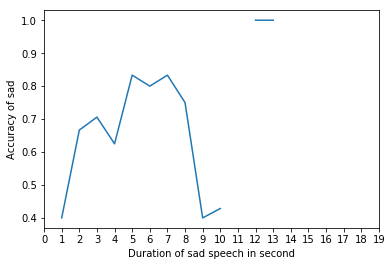

In [0]:
plt.plot(x,np.array(sad_acc)/np.array(sad_freq))
plt.xticks(np.arange(min(x), max(x)+1, 1))
plt.xlabel("Duration of sad speech in second")
plt.ylabel('Accuracy of sad')
plt.savefig('sad_accuracy.png')
plt.show()

In [0]:
x = np.arange(0,20)

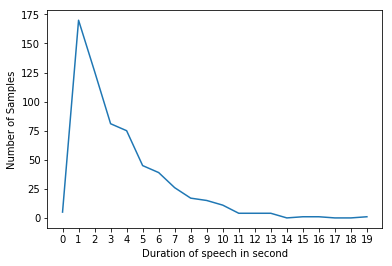

In [0]:
plt.plot(x,freq)
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.xlabel("Duration of speech in second")
plt.ylabel('Number of Samples')
plt.savefig('Frequency.png')

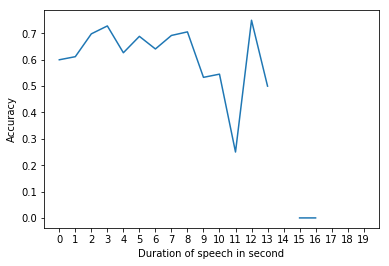

In [0]:
plt.plot(x,acc1)
plt.xticks(np.arange(min(x), max(x)+1, 1))
plt.xlabel("Duration of speech in second")
plt.ylabel('Accuracy')
plt.savefig('accuracy.png')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


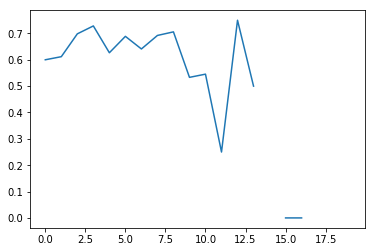

In [0]:
plt.plot(np.arange(20),np.array(acc)/np.array(freq))


In [0]:
X = []
Y = []
fs = 16e3
for ses_mod in data2:
    if 'impro' in ses_mod['id'] and ses_mod['emotion'] in emotions_used:
        #f, t, Sxx = signal.spectrogram(ses_mod['signal'], fs, nperseg=400,noverlap=200)
        signal = ses_mod['signal']
        if len(signal)>60200:
          Sxx = signal[0:60200]
        else:
          Sxx = np.zeros(60200)
          Sxx[0:len(ses_mod['signal'])] = signal
        
        
        X.append(Sxx)
        Y.append(ses_mod['emotion'])
        


X = np.array(X)

print(X.shape)

(2659, 60200)


In [0]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y=le.fit_transform(Y)

In [0]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

In [0]:
X_res.shape

(4396, 60200)

In [0]:
from sklearn.model_selection import train_test_split
X_res, X_test, y_res, y_test = train_test_split(
     X_res, y_res, test_size=0.25, random_state=42)

In [0]:
X_test.shape

(1099, 60200)

In [0]:
X_train = []

In [0]:
import scipy

In [0]:
for i in range(len(X_res)):
  f, t, Sxx = scipy.signal.spectrogram(X_res[i], fs, nperseg=400,noverlap=200)
  X_train.append(Sxx)

In [0]:
X_test1 = X_test

In [0]:
X_test = []

In [0]:
for i in range(len(X_test1)):
  f, t, Sxx = scipy.signal.spectrogram(X_test1[i], fs, nperseg=400,noverlap=200)
  X_test.append(Sxx)
  

In [0]:
X_train = np.array(X_train)
X_test = np.array(X_test)

In [0]:
y_train = y_res.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [0]:
X_train.shape

(3297, 201, 300)

In [0]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y_train = enc.fit_transform(y_train)
y_test = enc.transform(y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [0]:
y_train = np.array(y_train.todense())
y_test =  np.array(y_test.todense())

In [0]:
X_train = X_train.reshape(-1,201,300,1)
X_test = X_test.reshape(-1,201,300,1)


In [0]:
def make_model():
    in_layer = Input(shape=(201, 300,1))
    x = Conv2D(32,(5,5), activation = 'elu')(in_layer)  
    x = Dropout(0.5)(x)
    x = Conv2D(64,(5,5), activation = 'elu')(x)         
    x = Dropout(0.5)(x)
    x = Conv2D(64,(5,5), activation = 'elu')(x)         
    x = Dropout(0.5)(x)
    x = Conv2D(128, (5,5))(x)                           
    x = GlobalAveragePooling2D()(x)                     
    x = Dense(64,activation='elu')(x)
    x = Dropout(0.5)(x)
    output_layer = Dense(4, activation = "softmax")(x) # softmax output
    model = Model(inputs = in_layer, outputs=output_layer)
    return model

In [0]:
model  =  make_model()
model.compile(optimizer = "adam", loss = "categorical_crossentropy",
                    metrics=["accuracy"])
m_check = keras.callbacks.ModelCheckpoint(filepath = './cnn_spectrogram_oversample_whole.h5', monitor='val_acc', save_best_only=True, mode='max', verbose=1 )
hist = model.fit(X_train, y_train, 
                 batch_size=32, validation_data=(X_test,y_test),nb_epoch=100, verbose=1, shuffle = True,callbacks=[m_check] 
                )

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 3297 samples, validate on 1099 samples
Epoch 1/100
3297/3297 [==============================] - 186s 56ms/step - loss: 3.2121 - acc: 0.3549 - val_loss: 1.3077 - val_acc: 0.3876

Epoch 00001: val_acc improved from -inf to 0.38763, saving model to ./cnn_spectrogram_oversample_whole.h5
Epoch 2/100
3297/3297 [==============================] - 172s 52ms/step - loss: 1.3411 - acc: 0.4043 - val_loss: 1.1462 - val_acc: 0.4140

Epoch 00002: val_acc improved from 0.38763 to 0.41401, saving model to ./cnn_spectrogram_oversample_whole.h5
Epoch 3/100
3297/3297 [==============================] - 172s 52ms/step - loss: 1.2848 - acc: 0.4261 - val_loss: 1.1872 - val_acc: 0.4586

Epoch 00003: val_acc improved from 0.41401 to 0.45860, saving model to ./cnn_spectrogram_oversample_whole.h5
Epoch 4/100
3297/3297 [==============================] - 172s 52ms/step - loss: 1.2943 - acc: 0.4043 - val_loss: 1.1533 - val_acc: 0.4449

Epoch 00004: val_acc did not improve from 0.45860
Epoch 5/100
3297/3297 

In [0]:
best_model = load_model('./cnn_spectrogram_oversample_whole.h5')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


In [0]:
y_pred = best_model.predict(X_test)

In [0]:
from sklearn.metrics import classification_report, accuracy_score

In [0]:
for i in range(len(y_pred)):
  for j in range(len(y_pred[i])) :
    if y_pred[i][j]==max(y_pred[i]) :
      y_pred[i][j] = 1
    else:
      y_pred[i][j]=0

In [0]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.84      0.76       272
           1       0.66      0.61      0.63       283
           2       0.58      0.59      0.59       268
           3       0.88      0.75      0.81       276

   micro avg       0.70      0.70      0.70      1099
   macro avg       0.70      0.70      0.70      1099
weighted avg       0.70      0.70      0.70      1099
 samples avg       0.70      0.70      0.70      1099

